In [1]:
import numpy as np
import pandas as pd

from time import time as time
from math import inf as inf

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection as GRP
from sklearn.feature_selection import SelectKBest as SKB
from sklearn.feature_selection import f_classif
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import scale
from sklearn import preprocessing

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import homogeneity_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import completeness_score
from sklearn.metrics import accuracy_score as accuracy

import matplotlib.pyplot as plt

import random
np.random.seed(2019)
masterTime = time()

dataCC = pd.read_csv("creditCardDefaults.csv")
dataKK = pd.read_csv("kingRookKingPawn.csv")

In [2]:
instancesCC = dataCC.drop(labels='Y', axis='columns', inplace=False)
labelsCC = dataCC.iloc[:,-1]
instancesKK = dataKK.drop(labels='canWin?', axis='columns', inplace=False)
labelsKK = dataKK.iloc[:,-1]

# The King-Pawn vs. King-Rook dataset actually has a unique challenge. The data is in form of t/f and other character values.
# As sklearn's library doesn't work well (or at all) will non-integer values, we have to use pandas.get_dummies() to one-hot
# encode our character values into integers.
print("Number of Attribute Columns (KK): " + str(instancesKK.shape[1]))
instancesKK = pd.get_dummies(instancesKK)
print("Number of Attribute Columns (KK): " + str(instancesKK.shape[1]))

# here we set random_state constant so we get constant results
xTrainCC, xTestCC, yTrainCC, yTestCC = train_test_split(instancesCC, labelsCC, random_state=2019, test_size=.3)
xTrainKK, xTestKK, yTrainKK, yTestKK = train_test_split(instancesKK, labelsKK, random_state=2019, test_size=.3)

Number of Attribute Columns (KK): 36
Number of Attribute Columns (KK): 73


In [3]:
def plot_xys(xs, ys, lbls, title, xlab, ylab):
    plt.grid()
    plt.title(title)
    
    colors = ['b', 'm', 'g', 'r', 'k', 'c', 'y']

    for i in range(len(xs)):
        plt.plot(xs[i], ys[i], colors[i % len(colors)] + ',-', label=lbls[i])

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend()
    plt.show()

### K-Means Clustering

5
[0 0 0 ... 0 0 0]
[2 2 2 ... 2 2 2]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[6 6 6 ... 6 3 6]
[4 1 4 ... 4 7 4]
[3 0 3 ... 3 8 8]
[3 6 3 ... 3 0 0]
[7 1 1 ... 7 8 8]
[0 7 7 ... 0 9 9]
[9 1 1 ... 9 5 5]
[0 7 7 ... 0 9 9]
10
15


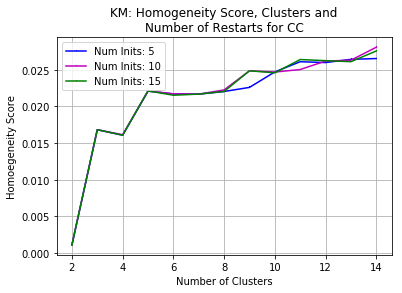

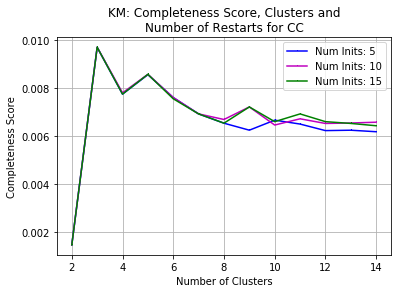

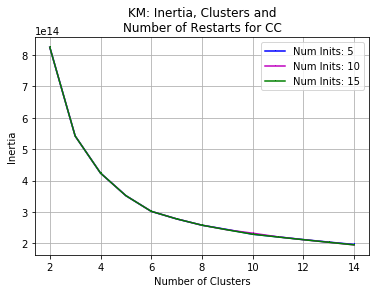

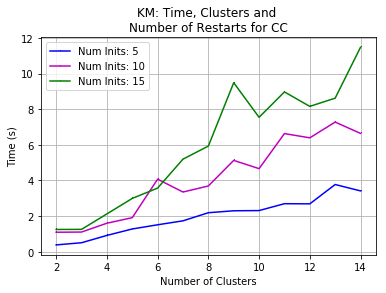

In [4]:
clusters = list(range(2, 15))
inits = list(range(5, 16, 5))
allInertia = []
allTimes = []
HomoScores = []
CompleteScores = []

for i in inits:
    print(i)
    hScores = []
    cScores = []
    times = []
    inert = []
    for c in clusters:
        km = KMeans(init='k-means++', n_clusters=c, n_init=i)
        
        t0 = time()
        km.fit(instancesCC)
        
        times.append(time()-t0)
        inert.append(km.inertia_)
        
        predictions = km.predict(instancesCC)
        hScores.append(homogeneity_score(labelsCC, predictions))
        cScores.append(completeness_score(labelsCC, predictions))
        
        if i == 5:
            print(str(km.labels_))
        
    allInertia.append(inert)
    allTimes.append(times)
    HomoScores.append(hScores)
    CompleteScores.append(cScores)

plot_xys([clusters for i in inits], HomoScores, ['Num Inits: ' + str(i) for i in inits],
    'KM: Homogeneity Score, Clusters and\nNumber of Restarts for CC',
    'Number of Clusters', 'Homoegeneity Score') 

plot_xys([clusters for i in inits], CompleteScores, ['Num Inits: ' + str(i) for i in inits],
    'KM: Completeness Score, Clusters and\nNumber of Restarts for CC',
    'Number of Clusters', 'Completeness Score') 

plot_xys([clusters for i in inits], allInertia, ['Num Inits: ' + str(i) for i in inits],
    'KM: Inertia, Clusters and\nNumber of Restarts for CC',
    'Number of Clusters', 'Inertia')

plot_xys([clusters for i in inits], allTimes, ['Num Inits: ' + str(i) for i in inits],
    'KM: Time, Clusters and \nNumber of Restarts for CC',
    'Number of Clusters', 'Time (s)')

5
10
15


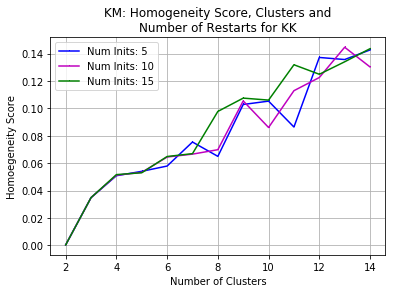

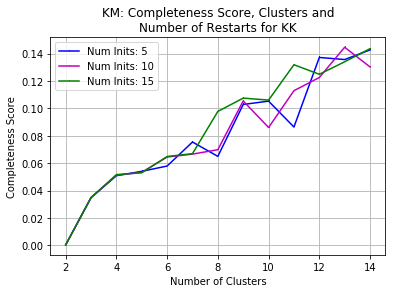

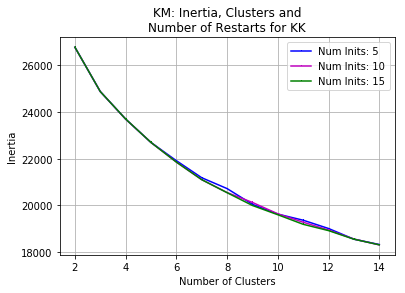

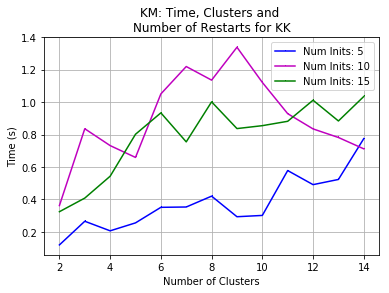

In [6]:
# Duplicate for KK

clusters = list(range(2, 15))
inits = list(range(5, 16, 5))
allInertia = []
allTimes = []
HomoScores = []
CompleteScores = []

for i in inits:
    print(i)
    hScores = []
    cScores = []
    times = []
    inert = []
    for c in clusters:
        km = KMeans(init='k-means++', n_clusters=c, n_init=i)
        
        t0 = time()
        km.fit(instancesKK)
        
        times.append(time()-t0)
        inert.append(km.inertia_)
        
        predictions = km.predict(instancesKK)
        hScores.append(homogeneity_score(labelsKK, predictions))
        cScores.append(homogeneity_score(labelsKK, predictions))
        
        
    allInertia.append(inert)
    allTimes.append(times)
    HomoScores.append(hScores)
    CompleteScores.append(cScores)

plot_xys([clusters for i in inits], HomoScores, ['Num Inits: ' + str(i) for i in inits],
    'KM: Homogeneity Score, Clusters and\nNumber of Restarts for KK',
    'Number of Clusters', 'Homoegeneity Score') 

plot_xys([clusters for i in inits], CompleteScores, ['Num Inits: ' + str(i) for i in inits],
    'KM: Completeness Score, Clusters and\nNumber of Restarts for KK',
    'Number of Clusters', 'Completeness Score') 

plot_xys([clusters for i in inits], allInertia, ['Num Inits: ' + str(i) for i in inits],
    'KM: Inertia, Clusters and\nNumber of Restarts for KK',
    'Number of Clusters', 'Inertia')

plot_xys([clusters for i in inits], allTimes, ['Num Inits: ' + str(i) for i in inits],
    'KM: Time, Clusters and \nNumber of Restarts for KK',
    'Number of Clusters', 'Time (s)')

In [8]:
# Getting those labels

km = KMeans(n_clusters=6)
km.fit(instancesCC)
KMclustersCC = km.labels_
print(KMclustersCC, KMclustersCC.shape)

km = KMeans(n_clusters=20)
km.fit(instancesKK)
KMclustersKK = km.labels_
print(KMclustersKK, KMclustersKK.shape)

[0 0 0 ... 0 0 0] (30000,)
[12  0  0 ...  9  9  9] (3196,)


### Expectation Maximization

2
4
6
8
10


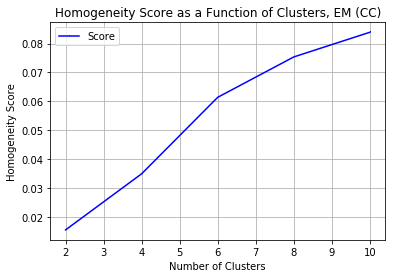

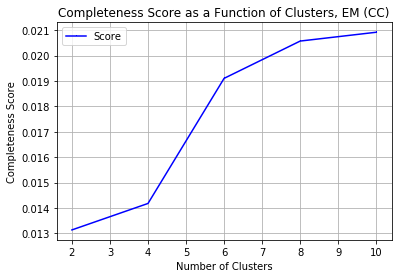

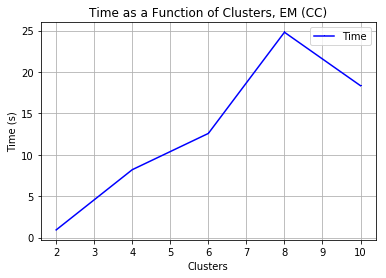

In [9]:
clusters = [2,4,6,8,10]
hScores = []
cScores = []
times = []

for c in clusters:
    print(c)
    em = GMM(n_components=c)
    
    t0 = time()
    em.fit(instancesCC)
    predictions = em.predict(instancesCC)
    times.append(time()-t0) 
    
    hScores.append(homogeneity_score(labelsCC, predictions))
    cScores.append(completeness_score(labelsCC, predictions))
    
plot_xys([clusters], [hScores], ['Score'],
    'Homogeneity Score as a Function of Clusters, EM (CC)',
    'Number of Clusters', 'Homogeneity Score')

plot_xys([clusters], [cScores], ['Score'],
    'Completeness Score as a Function of Clusters, EM (CC)',
    'Number of Clusters', 'Completeness Score')

plot_xys([clusters], [times], ['Time'],
    'Time as a Function of Clusters, EM (CC)',
    'Clusters', 'Time (s)')

1
6
11


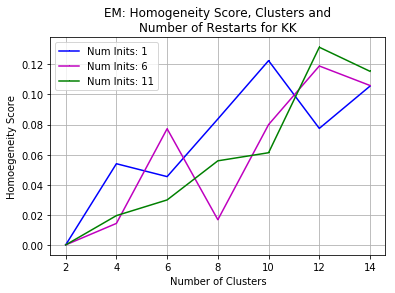

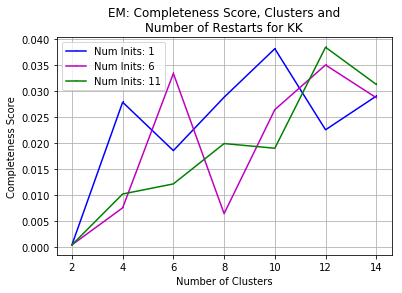

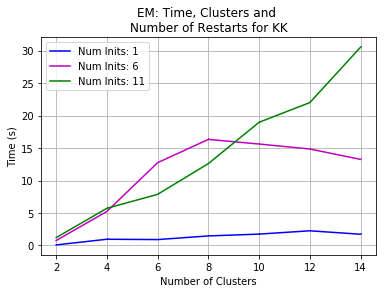

In [10]:
# Duplicate for KK with num inits varied

clusters = list(range(2, 15, 2))
inits = list(range(1, 12, 5))
allInertia = []
allTimes = []
HomoScores = []
CompleteScores = []

for i in inits:
    print(i)
    hScores = []
    cScores = []
    times = []
    inert = []
    for c in clusters:
        em = GMM(n_components=c, n_init=i)
        
        t0 = time()
        em.fit(instancesKK)
        
        times.append(time()-t0)
        
        predictions = em.predict(instancesKK)
        hScores.append(homogeneity_score(labelsKK, predictions))
        cScores.append(completeness_score(labelsKK, predictions))
        
    allInertia.append(inert)
    allTimes.append(times)
    HomoScores.append(hScores)
    CompleteScores.append(cScores)

plot_xys([clusters for i in inits], HomoScores, ['Num Inits: ' + str(i) for i in inits],
    'EM: Homogeneity Score, Clusters and\nNumber of Restarts for KK',
    'Number of Clusters', 'Homoegeneity Score') 

plot_xys([clusters for i in inits], CompleteScores, ['Num Inits: ' + str(i) for i in inits],
    'EM: Completeness Score, Clusters and\nNumber of Restarts for KK',
    'Number of Clusters', 'Completeness Score') 

plot_xys([clusters for i in inits], allTimes, ['Num Inits: ' + str(i) for i in inits],
    'EM: Time, Clusters and \nNumber of Restarts for KK',
    'Number of Clusters', 'Time (s)')

In [12]:
# Getting those labels

em = GMM(n_components=6)
em.fit(instancesCC)
EMclustersCC = em.predict(instancesCC)
print(EMclustersCC, EMclustersCC.shape)

em = GMM(n_components=10)
em.fit(instancesKK)
EMclustersKK = em.predict(instancesKK)
print(EMclustersKK, EMclustersKK.shape)

[3 5 0 ... 3 4 0] (30000,)
[3 3 3 ... 8 4 4] (3196,)


### PCA - Finding Ideal Dimension

In [13]:
# Exploring Vanilla PCA
pca = PCA(n_components=10)
PCAreducedDataCC = pca.fit_transform(instancesCC)
PCAreducedDataKK = pca.fit_transform(instancesKK)
print("CC: ", str(instancesCC.shape), " ---> ", str(PCAreducedDataCC.shape))
print("KK: ", str(instancesKK.shape), " ---> ", str(PCAreducedDataKK.shape))

print(pca.explained_variance_ )

CC:  (30000, 23)  --->  (30000, 10)
KK:  (3196, 73)  --->  (3196, 10)
[1.32047176 1.07366463 0.90452295 0.63580969 0.5844733  0.52234892
 0.44675181 0.40971144 0.35156135 0.32649448]


3
6
9
12
15
18
21


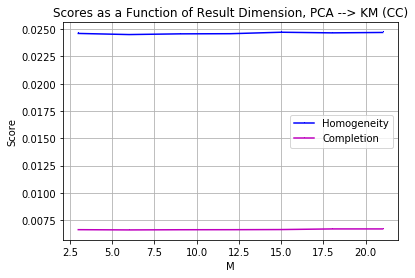

In [14]:
# Changing M Value (CC)
m = list(range(3, 22, 3))
hScores = []
cScores = []
times = []

for i in m:
    print(i)
    pca = PCA(n_components=i)
    PCAreducedDataCC = pca.fit_transform(instancesCC)
    
    km = KMeans(n_clusters=10)
    km.fit(PCAreducedDataCC)        
    predictions = km.predict(PCAreducedDataCC)
    hScores.append(homogeneity_score(labelsCC, predictions))
    cScores.append(completeness_score(labelsCC, predictions))
    
plot_xys([m, m], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Scores as a Function of Result Dimension, PCA --> KM (CC)',
    'M', 'Score')

10
15
20
25
30
35
40
45
50
55
60
65
70


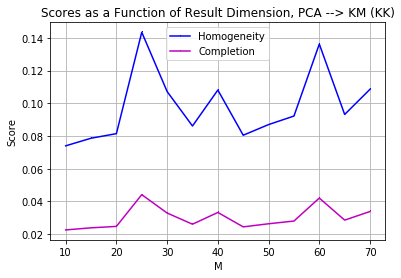

In [15]:
# Changing M Value (KK)
m = list(range(10, 71, 5))
hScores = []
cScores = []
times = []

for i in m:
    print(i)
    pca = PCA(n_components=i)
    PCAreducedDataKK = pca.fit_transform(instancesKK)
    
    km = KMeans(n_clusters=10)
    km.fit(PCAreducedDataKK)        
    predictions = km.predict(PCAreducedDataKK)
    hScores.append(homogeneity_score(labelsKK, predictions))
    cScores.append(completeness_score(labelsKK, predictions))
    
plot_xys([m, m], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Scores as a Function of Result Dimension, PCA --> KM (KK)',
    'M', 'Score')

### PCA --> Clustering Experiments

2
4
6
8
10


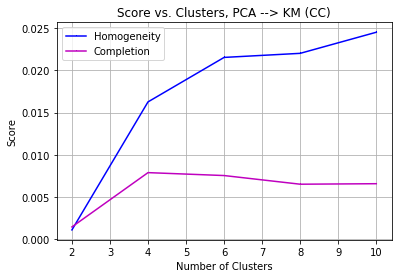

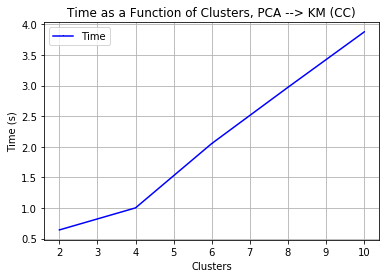

In [16]:
pca = PCA(n_components=6)
PCAreducedDataCC = pca.fit_transform(instancesCC)

clusters = [2,4,6,8,10]
hScores = []
cScores = []
times = []

for c in clusters:
    print(c)
    km = KMeans(n_clusters=c) # last time we found out num inits didnt really make a difference
    
    t0 = time()
    km.fit(PCAreducedDataCC)
    predictions = km.predict(PCAreducedDataCC)
    times.append(time()-t0) 
    
    hScores.append(homogeneity_score(labelsCC, predictions))
    cScores.append(completeness_score(labelsCC, predictions))
    
plot_xys([clusters, clusters], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Score vs. Clusters, PCA --> KM (CC)',
    'Number of Clusters', 'Score')

plot_xys([clusters], [times], ['Time'],
    'Time as a Function of Clusters, PCA --> KM (CC)',
    'Clusters', 'Time (s)')

2
4
6
8
10


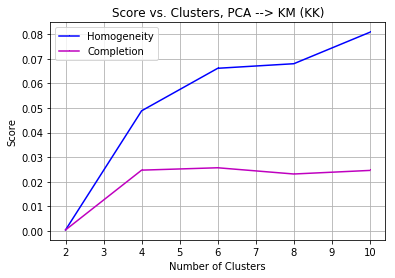

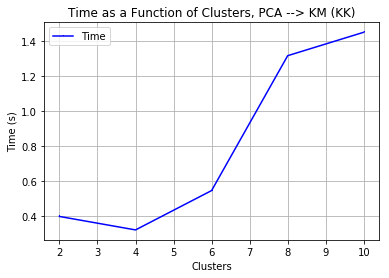

In [17]:
# Duplicate for KK

pca = PCA(n_components=20)
PCAreducedDataKK = pca.fit_transform(instancesKK)

clusters = [2,4,6,8,10]
hScores = []
cScores = []
times = []

for c in clusters:
    print(c)
    km = KMeans(n_clusters=c) # last time we found out num inits didnt really make a difference
    
    t0 = time()
    km.fit(PCAreducedDataKK)
    predictions = km.predict(PCAreducedDataKK)
    times.append(time()-t0) 
    
    hScores.append(homogeneity_score(labelsKK, predictions))
    cScores.append(completeness_score(labelsKK, predictions))
    
plot_xys([clusters, clusters], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Score vs. Clusters, PCA --> KM (KK)',
    'Number of Clusters', 'Score')

plot_xys([clusters], [times], ['Time'],
    'Time as a Function of Clusters, PCA --> KM (KK)',
    'Clusters', 'Time (s)')

### ICA

3
6
9
12
15
18
21


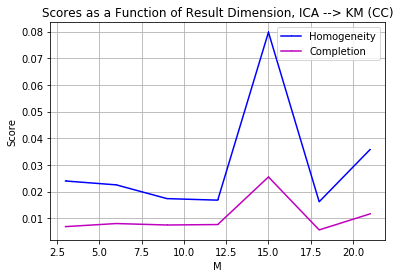

In [18]:
# Changing M Value (CC)
m = list(range(3, 22, 3))
hScores = []
cScores = []
times = []

for i in m:
    print(i)
    ica = FastICA(n_components=i)
    ICAreducedDataCC = ica.fit_transform(instancesCC)
    
    km = KMeans(n_clusters=10)
    km.fit(ICAreducedDataCC)        
    predictions = km.predict(ICAreducedDataCC)
    hScores.append(homogeneity_score(labelsCC, predictions))
    cScores.append(completeness_score(labelsCC, predictions))
    
plot_xys([m, m], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Scores as a Function of Result Dimension, ICA --> KM (CC)',
    'M', 'Score')

10
15
20
25
30
35
40
45
50
55
60
65
70


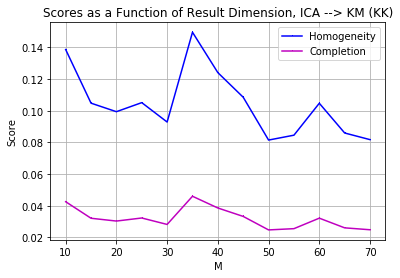

In [19]:
# Changing M Value (KK)
m = list(range(10, 71, 5))
hScores = []
cScores = []
times = []

for i in m:
    print(i)
    ica = FastICA(n_components=i)
    PCAreducedDataKK = pca.fit_transform(instancesKK)
    
    km = KMeans(n_clusters=10)
    km.fit(PCAreducedDataKK)        
    predictions = km.predict(PCAreducedDataKK)
    hScores.append(homogeneity_score(labelsKK, predictions))
    cScores.append(completeness_score(labelsKK, predictions))
    
plot_xys([m, m], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Scores as a Function of Result Dimension, ICA --> KM (KK)',
    'M', 'Score')

### ICA --> Clustering Experiments

2
4
6
8
10


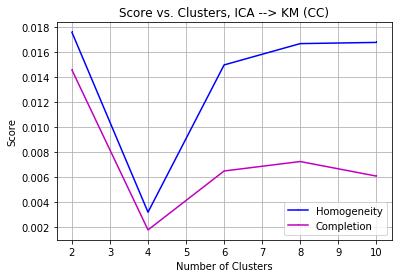

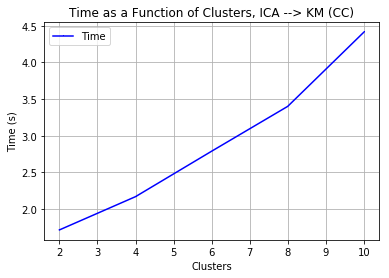

In [20]:
ica = FastICA(n_components=15)
ICAreducedDataCC = ica.fit_transform(instancesCC)

clusters = [2,4,6,8,10]
hScores = []
cScores = []
times = []

for c in clusters:
    print(c)
    km = KMeans(n_clusters=c) # last time we found out num inits didnt really make a difference
    
    t0 = time()
    km.fit(ICAreducedDataCC)
    predictions = km.predict(ICAreducedDataCC)
    times.append(time()-t0) 
    
    hScores.append(homogeneity_score(labelsCC, predictions))
    cScores.append(completeness_score(labelsCC, predictions))
    
plot_xys([clusters, clusters], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Score vs. Clusters, ICA --> KM (CC)',
    'Number of Clusters', 'Score')

plot_xys([clusters], [times], ['Time'],
    'Time as a Function of Clusters, ICA --> KM (CC)',
    'Clusters', 'Time (s)')

2
4
6
8
10


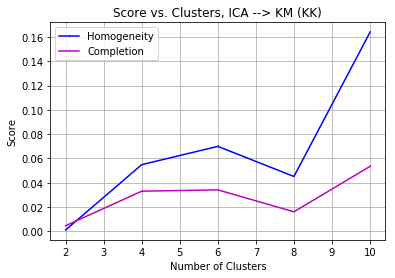

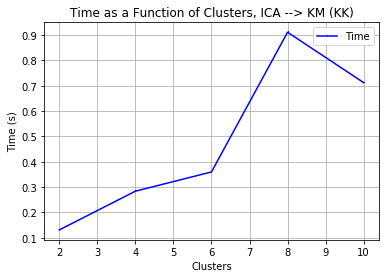

In [21]:
# Duplicate for KK

ica = FastICA(n_components=30)
ICAreducedDataKK = ica.fit_transform(instancesKK)

clusters = [2,4,6,8,10]
hScores = []
cScores = []
times = []

for c in clusters:
    print(c)
    km = KMeans(n_clusters=c) # last time we found out num inits didnt really make a difference
    
    t0 = time()
    km.fit(ICAreducedDataKK)
    predictions = km.predict(ICAreducedDataKK)
    times.append(time()-t0) 
    
    hScores.append(homogeneity_score(labelsKK, predictions))
    cScores.append(completeness_score(labelsKK, predictions))
    
plot_xys([clusters, clusters], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Score vs. Clusters, ICA --> KM (KK)',
    'Number of Clusters', 'Score')

plot_xys([clusters], [times], ['Time'],
    'Time as a Function of Clusters, ICA --> KM (KK)',
    'Clusters', 'Time (s)')

### RCA (Randomized Projections)

3
6
9
12
15
18
21


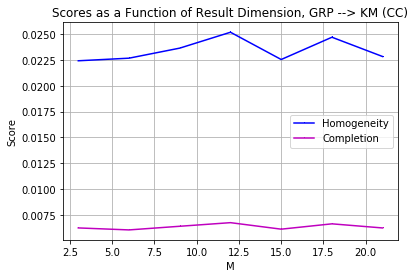

In [22]:
# We use Gaussian Random Projections
# Changing M Value (CC)
m = list(range(3, 22, 3))
hScores = []
cScores = []
times = []

for i in m:
    print(i)
    grp = GRP(n_components=i)
    GRPreducedDataCC = grp.fit_transform(instancesCC)
    
    km = KMeans(n_clusters=10)
    km.fit(GRPreducedDataCC)        
    predictions = km.predict(GRPreducedDataCC)
    hScores.append(homogeneity_score(labelsCC, predictions))
    cScores.append(completeness_score(labelsCC, predictions))
    
plot_xys([m, m], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Scores as a Function of Result Dimension, GRP --> KM (CC)',
    'M', 'Score')

10
15
20
25
30
35
40
45
50
55
60
65
70


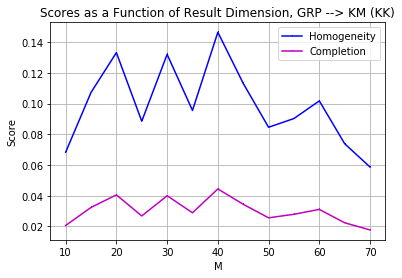

In [23]:
# Changing M Value (KK)
m = list(range(10, 71, 5))
hScores = []
cScores = []
times = []

for i in m:
    print(i)
    grp = GRP(n_components=i)
    GRPreducedDataKK = grp.fit_transform(instancesKK)
    
    km = KMeans(n_clusters=10)
    km.fit(GRPreducedDataKK)        
    predictions = km.predict(GRPreducedDataKK)
    hScores.append(homogeneity_score(labelsKK, predictions))
    cScores.append(completeness_score(labelsKK, predictions))
    
plot_xys([m, m], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Scores as a Function of Result Dimension, GRP --> KM (KK)',
    'M', 'Score')

### RCA --> Clustering Experiments

2
4
6
8
10


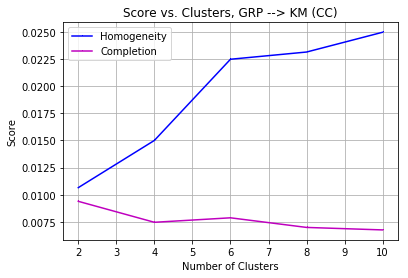

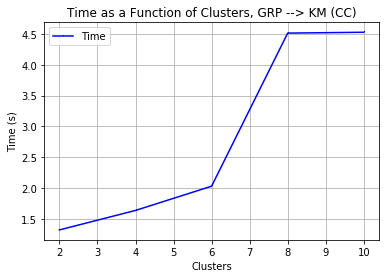

In [24]:
grp = GRP(n_components=6)
GRPreducedDataCC = grp.fit_transform(instancesCC)

clusters = [2,4,6,8,10]
hScores = []
cScores = []
times = []

for c in clusters:
    print(c)
    km = KMeans(n_clusters=c)
    
    t0 = time()
    km.fit(GRPreducedDataCC)
    predictions = km.predict(GRPreducedDataCC)
    times.append(time()-t0) 
    
    hScores.append(homogeneity_score(labelsCC, predictions))
    cScores.append(completeness_score(labelsCC, predictions))
    
plot_xys([clusters, clusters], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Score vs. Clusters, GRP --> KM (CC)',
    'Number of Clusters', 'Score')

plot_xys([clusters], [times], ['Time'],
    'Time as a Function of Clusters, GRP --> KM (CC)',
    'Clusters', 'Time (s)')

2
4
6
8
10


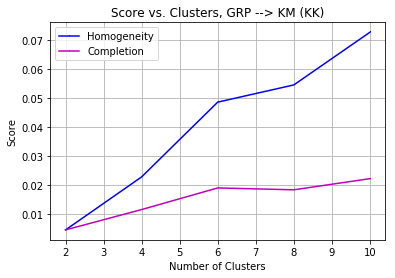

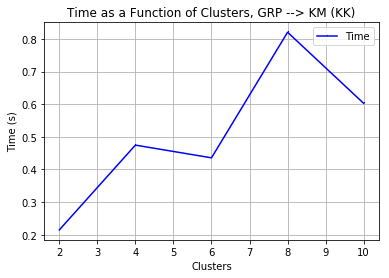

In [25]:
# Duplicate for KK
grp = GRP(n_components=20)
GRPreducedDataKK = grp.fit_transform(instancesKK)

clusters = [2,4,6,8,10]
hScores = []
cScores = []
times = []

for c in clusters:
    print(c)
    km = KMeans(n_clusters=c)
    
    t0 = time()
    km.fit(GRPreducedDataKK)
    predictions = km.predict(GRPreducedDataKK)
    times.append(time()-t0) 
    
    hScores.append(homogeneity_score(labelsKK, predictions))
    cScores.append(completeness_score(labelsKK, predictions))
    
plot_xys([clusters, clusters], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Score vs. Clusters, GRP --> KM (KK)',
    'Number of Clusters', 'Score')

plot_xys([clusters], [times], ['Time'],
    'Time as a Function of Clusters, GRP --> KM (KK)',
    'Clusters', 'Time (s)')

### Select K Best Attributes (ANOVA F-Value)

3
6
9
12
15
18
21


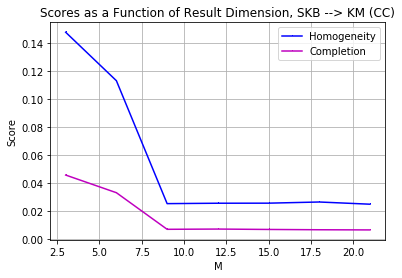

In [26]:
# Changing M Value (CC)
m = list(range(3, 22, 3))
hScores = []
cScores = []
times = []

for i in m:
    print(i)
    skb = SKB(f_classif, k=i)
    SKBreducedDataCC = skb.fit_transform(instancesCC, labelsCC)
    
    km = KMeans(n_clusters=10)
    km.fit(SKBreducedDataCC)        
    predictions = km.predict(SKBreducedDataCC)
    hScores.append(homogeneity_score(labelsCC, predictions))
    cScores.append(completeness_score(labelsCC, predictions))
    
plot_xys([m, m], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Scores as a Function of Result Dimension, SKB --> KM (CC)',
    'M', 'Score')

10
15
20
25
30
35
40
45
50
55
60
65
70


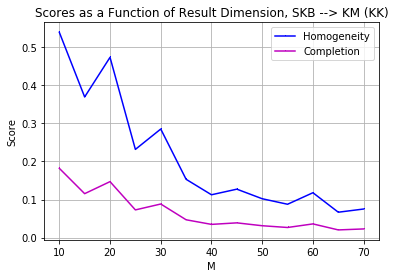

In [27]:
# Changing M Value (KK)
m = list(range(10, 71, 5))
hScores = []
cScores = []
times = []

for i in m:
    print(i)
    skb = SKB(f_classif, k=i)
    SKBreducedDataKK = skb.fit_transform(instancesKK, labelsKK)
    
    km = KMeans(n_clusters=10)
    km.fit(SKBreducedDataKK)        
    predictions = km.predict(SKBreducedDataKK)
    hScores.append(homogeneity_score(labelsKK, predictions))
    cScores.append(completeness_score(labelsKK, predictions))
    
plot_xys([m, m], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Scores as a Function of Result Dimension, SKB --> KM (KK)',
    'M', 'Score')

### SKB --> Clustering Experiments

2
4
6
8
10


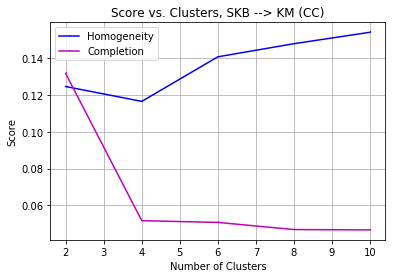

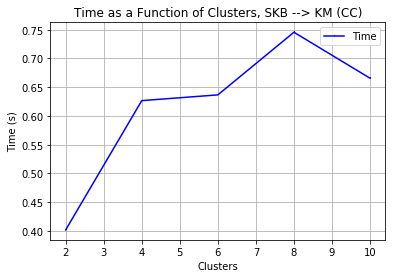

In [28]:
skb = SKB(f_classif, k=3)
SKBreducedDataCC = skb.fit_transform(instancesCC, labelsCC)

clusters = [2,4,6,8,10]
hScores = []
cScores = []
times = []

for c in clusters:
    print(c)
    km = KMeans(n_clusters=c)
    
    t0 = time()
    km.fit(SKBreducedDataCC)
    predictions = km.predict(SKBreducedDataCC)
    times.append(time()-t0) 
    
    hScores.append(homogeneity_score(labelsCC, predictions))
    cScores.append(completeness_score(labelsCC, predictions))
    
plot_xys([clusters, clusters], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Score vs. Clusters, SKB --> KM (CC)',
    'Number of Clusters', 'Score')

plot_xys([clusters], [times], ['Time'],
    'Time as a Function of Clusters, SKB --> KM (CC)',
    'Clusters', 'Time (s)')

2
4
6
8
10


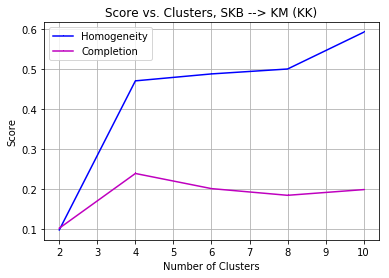

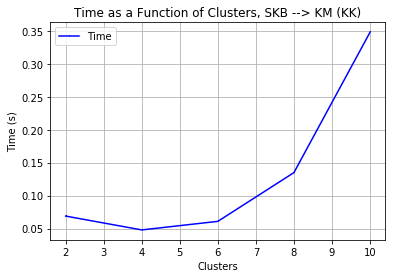

In [29]:
# Duplicate for KK
skb = SKB(f_classif, k=10)
SKBreducedDataKK = skb.fit_transform(instancesKK, labelsKK)

clusters = [2,4,6,8,10]
hScores = []
cScores = []
times = []

for c in clusters:
    print(c)
    km = KMeans(n_clusters=c)
    
    t0 = time()
    km.fit(SKBreducedDataKK)
    predictions = km.predict(SKBreducedDataKK)
    times.append(time()-t0) 
    
    hScores.append(homogeneity_score(labelsKK, predictions))
    cScores.append(completeness_score(labelsKK, predictions))
    
plot_xys([clusters, clusters], [hScores, cScores], ['Homogeneity', 'Completion'],
    'Score vs. Clusters, SKB --> KM (KK)',
    'Number of Clusters', 'Score')

plot_xys([clusters], [times], ['Time'],
    'Time as a Function of Clusters, SKB --> KM (KK)',
    'Clusters', 'Time (s)')

### ANNs After Dimensionality Reduction

In [30]:
pca = PCA(n_components=6)
PCAreducedDataCC = pca.fit_transform(instancesCC)

ica = FastICA(n_components=15)
ICAreducedDataCC = ica.fit_transform(instancesCC)

grp = GRP(n_components=6)
GRPreducedDataCC = grp.fit_transform(instancesCC)

skb = SKB(f_classif, k=3)
SKBreducedDataCC = skb.fit_transform(instancesCC, labelsCC)

datasets = [instancesCC, PCAreducedDataCC, ICAreducedDataCC, GRPreducedDataCC, SKBreducedDataCC]

for data in datasets:
    ann = MLPClassifier(random_state=2019)
    t0 = time()
    ann.fit(data, labelsCC)
    t1 = time()
    preds = ann.predict(data)
    print("Accuracy: ", str(accuracy(labelsCC, preds)), " Time: ", str(t1-t0))
    
print("PCA Eigenvalues:")
print(pca.explained_variance_)

Accuracy:  0.7761333333333333  Time:  3.145169973373413
Accuracy:  0.7490666666666667  Time:  1.4291832447052002
Accuracy:  0.8031333333333334  Time:  12.218987703323364
Accuracy:  0.7162666666666667  Time:  1.3812105655670166
Accuracy:  0.8206  Time:  2.6584725379943848
PCA Eigenvalues:
[2.77282244e+10 1.34160226e+10 1.38651759e+09 7.68956999e+08
 4.27909012e+08 4.10708298e+08]


In [31]:
accuracies = []
for i in range(20):
    grp = GRP(n_components=6)
    GRPreducedDataCC = grp.fit_transform(instancesCC)
    ann = MLPClassifier(random_state=2019)
    t0 = time()
    ann.fit(GRPreducedDataCC, labelsCC)
    t1 = time()
    preds = ann.predict(GRPreducedDataCC)
    acc = accuracy(labelsCC, preds)
    accuracies.append(acc)
    print("Accuracy: ", str(acc), " Time: ", str(t1-t0))
print(np.var(accuracies))

Accuracy:  0.7052333333333334  Time:  1.9488835334777832
Accuracy:  0.4785  Time:  0.9194731712341309
Accuracy:  0.7761  Time:  1.5651013851165771
Accuracy:  0.7707666666666667  Time:  1.9178998470306396
Accuracy:  0.7770666666666667  Time:  1.8879179954528809
Accuracy:  0.7673666666666666  Time:  3.6489062309265137
Accuracy:  0.7726  Time:  1.9488823413848877
Accuracy:  0.3857  Time:  2.7074644565582275
Accuracy:  0.7499333333333333  Time:  1.8509411811828613
Accuracy:  0.5208  Time:  1.3422257900238037
Accuracy:  0.7042333333333334  Time:  1.4101910591125488
Accuracy:  0.7596333333333334  Time:  0.7195873260498047
Accuracy:  0.7681333333333333  Time:  1.042405128479004
Accuracy:  0.7715  Time:  1.3152413368225098
Accuracy:  0.7633  Time:  2.156764268875122
Accuracy:  0.7738333333333334  Time:  1.255279302597046
Accuracy:  0.6579  Time:  1.6080653667449951
Accuracy:  0.5164  Time:  0.7305805683135986
Accuracy:  0.7615  Time:  0.8405177593231201
Accuracy:  0.5192666666666667  Time:  1.

In [50]:
# Getting those labels

km = KMeans(n_clusters=6)
km.fit(instancesCC)
KMclustersCC = km.labels_
print(KMclustersCC, KMclustersCC.shape)

km = KMeans(n_clusters=20)
km.fit(instancesKK)
KMclustersKK = km.labels_
print(KMclustersKK, KMclustersKK.shape)

[5 5 5 ... 5 5 5] (30000,)
[ 5  2  2 ... 15 15 15] (3196,)


In [53]:
t0 = time()
nn = MLPClassifier(random_state=2019)
nn.fit(KMclustersCC.reshape(-1, 1), labelsCC)
print(str(accuracy(nn.predict(KMclustersCC.reshape(-1, 1)), labelsCC)))
print(time()-t0)

t1 = time()
nn = MLPClassifier(random_state=2019)
nn.fit(instancesCC, labelsCC)
print(str(accuracy(nn.predict(instancesCC), labelsCC)))
print(time()-t1)

augmentedData = instancesCC
augmentedData["cluster"] = KMclustersCC.reshape(-1, 1)
t2 = time()
nn = MLPClassifier(random_state=2019)
nn.fit(augmentedData, labelsCC)
print(str(accuracy(nn.predict(augmentedData), labelsCC)), augmentedData.shape)
print(time()-t2)

0.7788
1.103363275527954
0.7742666666666667
1.9099042415618896
0.7742666666666667 (30000, 24)
1.8079807758331299
